In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [281]:
hv_construction = pd.read_csv('./Harvey-Industry/construction_all_employees.csv', header=None, names=['date', 'employment'])


In [282]:
hv_construction.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hv_construction['date']),
                                freq = 'M')

In [283]:
hv_construction.drop(columns = 'date', inplace = True)

In [284]:
hv_construction.shape

(42, 1)

In [331]:
from statsmodels.tsa.stattools import adfuller # if p-value is less than alpha (10%) then we 
                                               # have stationarity

In [332]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [333]:
interpret_dftest(adfuller(hv_construction['employment'])) # p > .1 so cannot assume stationarity

Test Statistic   -1.035889
p-value           0.739951
dtype: float64

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


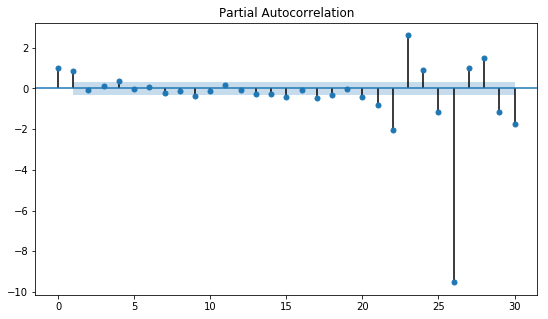

In [334]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(hv_construction['employment'], lags=30, ax=ax)
plt.show();

# Partial Auto Correlaton plot shows observations are highly correlated. the observations 
# in the blue shade are not highly correlated. we will use p = 1 or 2. 

In [356]:
hv_construction.head()

,employment
2015-01-31,189416.0
2015-02-28,193353.0
2015-03-31,193099.0
2015-04-30,190885.0
2015-05-31,193742.0


In [286]:
train = hv_construction.iloc[0:31]

test = hv_construction.iloc[31:]

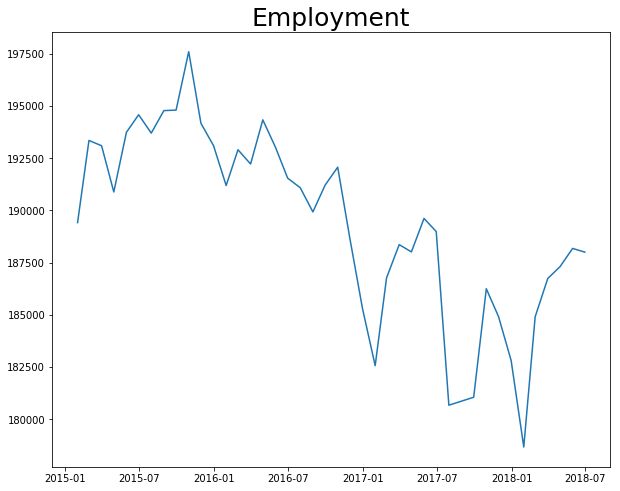

In [306]:
plt.figure(figsize=(10,8))
plt.plot(hv_construction['employment'])
plt.title(label = 'Employment', fontsize=25)
plt.show();

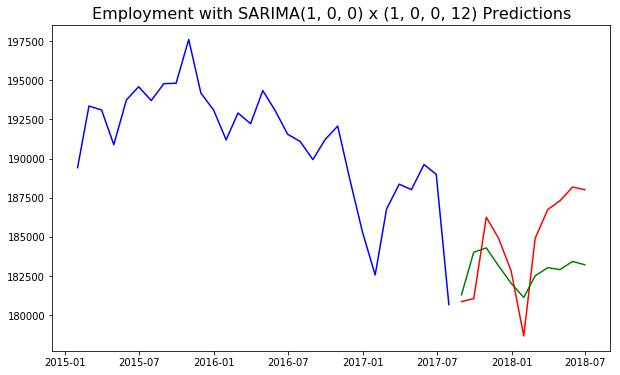

9720889.290268125


In [292]:
sarima = SARIMAX(endog = train['employment'],
                 order = (1, 0, 2),              
                 seasonal_order = (1, 0, 0, 12)) 
# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 31 and end at 41.
preds_hvconstruction = model.predict(start=31, end=41)


# Plotting data.
plt.figure(figsize=(10,6))
plt.plot(train['employment'], color = 'blue')
plt.plot(test['employment'], color = 'red')
plt.plot(preds_hvconstruction, color = 'green')
plt.title(label = 'Employment with SARIMA(1, 0, 0) x (1, 0, 0, 12) Predictions', fontsize=16)
plt.show();


print(mean_squared_error(test['employment'], preds_hvconstruction))


In [293]:
preds_df = preds_hvconstruction.to_frame(name='employment')

In [294]:
preds_df

,employment
2017-08-31,181295.377497
2017-09-30,184014.462849
2017-10-31,184292.746351
2017-11-30,183150.134025
2017-12-31,182032.682440
2018-01-31,181124.128179
2018-02-28,182510.129756
2018-03-31,183029.093709
2018-04-30,182906.800850
2018-05-31,183430.400432


In [299]:
df_merged_hvconstruction = hv_construction.merge(preds_df, how='outer', left_index=True, right_index=True)



In [300]:
df_merged_hvconstruction

,employment_x,employment_y
2015-01-31,189416.0,NaN
2015-02-28,193353.0,NaN
2015-03-31,193099.0,NaN
2015-04-30,190885.0,NaN
2015-05-31,193742.0,NaN
2015-06-30,194584.0,NaN
2015-07-31,193704.0,NaN
2015-08-31,194782.0,NaN
2015-09-30,194806.0,NaN
2015-10-31,197604.0,NaN


In [301]:
df_merged_hvconstruction['difference'] = df_merged_hvconstruction.employment_x - df_merged_hvconstruction.employment_y

In [302]:
df_merged_hvconstruction

,employment_x,employment_y,difference
2015-01-31,189416.0,NaN,NaN
2015-02-28,193353.0,NaN,NaN
2015-03-31,193099.0,NaN,NaN
2015-04-30,190885.0,NaN,NaN
2015-05-31,193742.0,NaN,NaN
2015-06-30,194584.0,NaN,NaN
2015-07-31,193704.0,NaN,NaN
2015-08-31,194782.0,NaN,NaN
2015-09-30,194806.0,NaN,NaN
2015-10-31,197604.0,NaN,NaN


In [318]:
hv_health = pd.read_csv('./Harvey-Industry/education_health_services_all_employees.csv', header=None, names=['date', 'employment'])


In [319]:
hv_health['date']

0     2015-01
1     2015-02
2     2015-03
3     2015-04
4     2015-05
5     2015-06
6     2015-07
7     2015-08
8     2015-09
9     2015-10
10    2015-11
11    2015-12
12    2016-01
13    2016-02
14    2016-03
15    2016-04
16    2016-05
17    2016-06
18    2016-07
19    2016-08
20    2016-09
21    2016-10
22    2016-11
23    2016-12
24    2017-01
25    2017-02
26    2017-03
27    2017-04
28    2017-05
29    2017-06
30    2017-07
31    2017-08
32    2017-09
33    2017-10
34    2017-11
35    2017-12
36    2018-01
37    2018-02
38    2018-03
39    2018-04
40    2018-05
41    2018-06
Name: date, dtype: object

In [320]:
hv_health.columns

Index(['date', 'employment'], dtype='object')

In [321]:
hv_health.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hv_health['date']),
                                freq = 'M')


In [322]:
hv_health.drop(columns = 'date', inplace = True)



In [323]:
train_health = hv_health.iloc[0:31]

test_health = hv_health.iloc[31:]

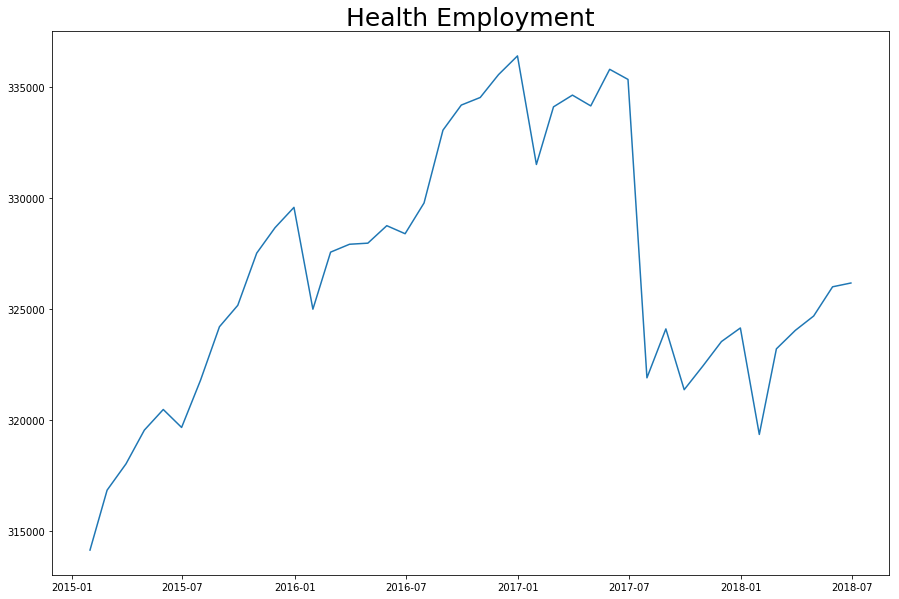

In [324]:
plt.figure(figsize=(15,10))
plt.plot(hv_health['employment'])
plt.title(label = 'Health Employment', fontsize=25)
plt.show();

18040264.00066453


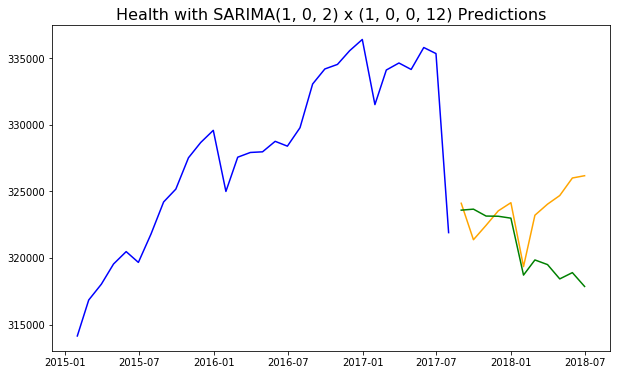

In [327]:
sarima = SARIMAX(enforce_stationarity=False, endog = train_health['employment'],
                 order = (1, 0, 2),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 12)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 150 and end at 187.
preds_hvhealth = model.predict(start=31, end=41)

# Evaluate predictions.
print(mean_squared_error(test_health['employment'], preds_hvhealth))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train_health['employment'], color = 'blue')
plt.plot(test_health['employment'], color = 'orange')
plt.plot(preds_hvhealth, color = 'green')
plt.title(label = 'Health with SARIMA(1, 0, 2) x (1, 0, 0, 12) Predictions', fontsize=16)
plt.show();

In [328]:
preds_hvhealth

2017-08-31    323584.831719
2017-09-30    323660.220154
2017-10-31    323141.959021
2017-11-30    323127.201591
2017-12-31    322983.821508
2018-01-31    318712.310628
2018-02-28    319847.628733
2018-03-31    319498.375020
2018-04-30    318424.979216
2018-05-31    318896.591709
2018-06-30    317858.190619
Freq: M, dtype: float64

In [329]:
df_preds_health = preds_hvhealth.to_frame(name= 'employment')

In [330]:
df_preds_health.head()

,employment
2017-08-31,323584.831719
2017-09-30,323660.220154
2017-10-31,323141.959021
2017-11-30,323127.201591
2017-12-31,322983.821508


In [161]:
hv_financial = pd.read_csv('./Harvey-Industry/financial_activities_all_employees.csv', header=None, names=['date', 'employment'])


In [162]:
hv_financial.head()

,date,employment
0,2015-01,135064.0
1,2015-02,135632.0
2,2015-03,136036.0
3,2015-04,136634.0
4,2015-05,137001.0


In [163]:
hv_financial.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hv_financial['date']),
                                freq = 'M')

In [164]:
hv_financial.drop(columns = 'date', inplace = True)

In [166]:
train_financial = hv_financial.iloc[0:31]

test_financial = hv_financial.iloc[31:]

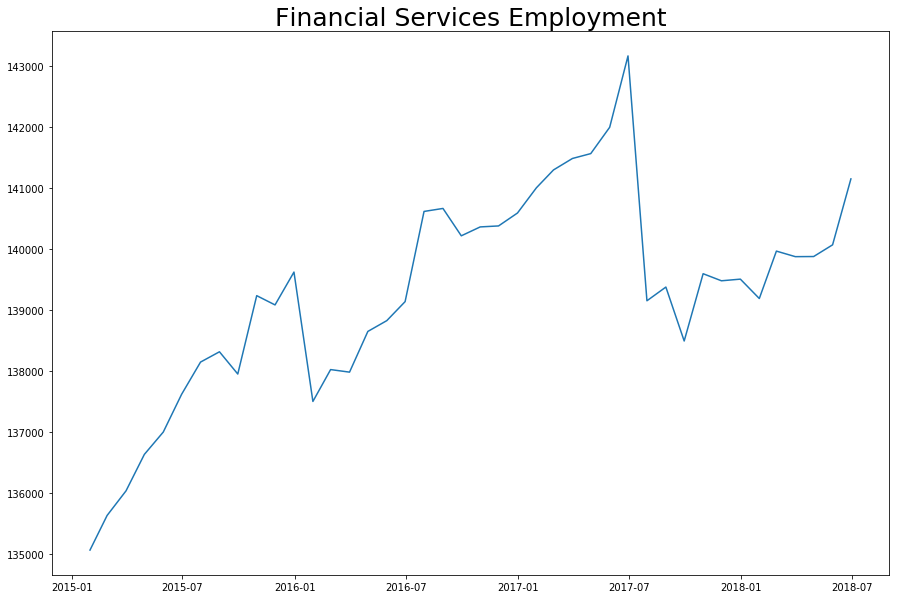

In [167]:
plt.figure(figsize=(15,10))
plt.plot(hv_financial['employment'])
plt.title(label = 'Financial Services Employment', fontsize=25)
plt.show();

In [223]:
ar1 = ARIMA(endog = hv_financial['employment'], # Y variable
            order = (4,0,1)) 



model = ar1.fit()

preds_financial = model.predict()

r2_score(preds_financial, hv_financial['employment'])

0.5814223529514857

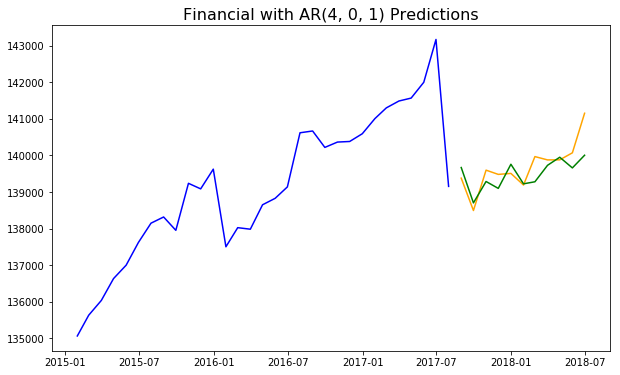

In [224]:
preds_financial = model.predict(start=31, end=41)

plt.figure(figsize=(10,6))
plt.plot(train_financial['employment'], color = 'blue')
plt.plot(test_financial['employment'], color = 'orange')
plt.plot(preds_financial, color = 'green')
plt.title(label = 'Financial with AR(4, 0, 1) Predictions', fontsize=16)
plt.show();

In [225]:
preds_financial = preds_financial.to_frame(name= 'employment')

In [226]:
preds_financial.head()

,employment
2017-08-31,139670.902863
2017-09-30,138703.749227
2017-10-31,139288.711620
2017-11-30,139100.342781
2017-12-31,139760.484879


In [250]:
hv_leisure = pd.read_csv('./Harvey-Industry/leisure_hospitality_all_employees.csv', header=None, names=['date', 'employment'])
hv_leisure.head()


,date,employment
0,2015-01,252075.0
1,2015-02,258427.0
2,2015-03,265914.0
3,2015-04,268483.0
4,2015-05,272793.0


In [230]:
hv_leisure.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hv_leisure['date']),
                                freq = 'M')

hv_leisure.drop(columns = 'date', inplace = True)

train_leisure = hv_leisure.iloc[0:31]

test_leisure = hv_leisure.iloc[31:]

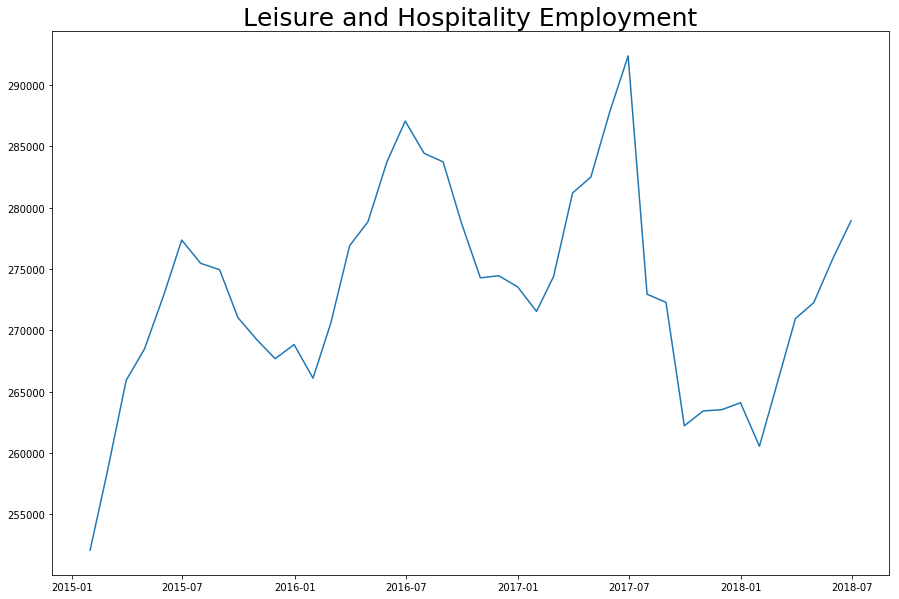

In [231]:
plt.figure(figsize=(15,10))
plt.plot(hv_leisure['employment'])
plt.title(label = 'Leisure and Hospitality Employment', fontsize=25)
plt.show();

In [233]:
# Import Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

# Define function to easily interpret results.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

# Execute test on training data.
interpret_dftest(adfuller(train_leisure['employment']))

Test Statistic   -2.728522
p-value           0.069231
dtype: float64

15552851.14570204


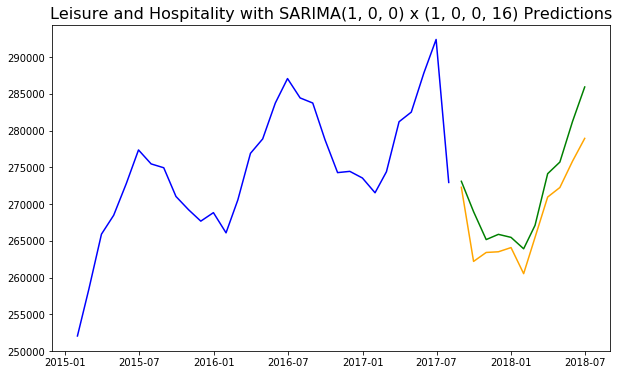

In [246]:
sarima = SARIMAX(enforce_stationarity=False, endog = train_leisure['employment'],
                 order = (1, 0, 2),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 12)) # (P, D, Q, S)


# Fit SARIMA model.
model = sarima.fit()

preds_leisure = model.predict(start=31, end=41)

# Evaluate predictions.
print(mean_squared_error(test_leisure['employment'], preds_leisure))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train_leisure['employment'], color = 'blue')
plt.plot(test_leisure['employment'], color = 'orange')
plt.plot(preds_leisure, color = 'green')
plt.title(label = 'Leisure and Hospitality with SARIMA(1, 0, 0) x (1, 0, 0, 16) Predictions', fontsize=16)
plt.show();

In [248]:
preds_leisure = preds_leisure.to_frame(name= 'employment')

In [251]:
preds_leisure.head()

,employment
2017-08-31,262349.665479
2017-09-30,238466.983895
2017-10-31,214727.600725
2017-11-30,207647.824095
2017-12-31,194523.791639


In [252]:
hv_manufacturing = pd.read_csv('./Harvey-Industry/manufacturing_all_employees.csv', header=None, names=['date', 'employment'])
hv_manufacturing.head()


,date,employment
0,2015-01,237880.0
1,2015-02,235856.0
2,2015-03,233827.0
3,2015-04,229988.0
4,2015-05,228179.0


In [ ]:
hv_manufacturing.drop(columns = 'date', inplace = True)

In [263]:
train_manufacturing = hv_manufacturing.iloc[:31]

test_manufacturing = hv_manufacturing.iloc[31:]

In [ ]:
hv_manufacturing.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hv_manufacturing['date']),
                                freq = 'M')

In [262]:

hv_manufacturing.head()

,employment
2015-01-31,237880.0
2015-02-28,235856.0
2015-03-31,233827.0
2015-04-30,229988.0
2015-05-31,228179.0


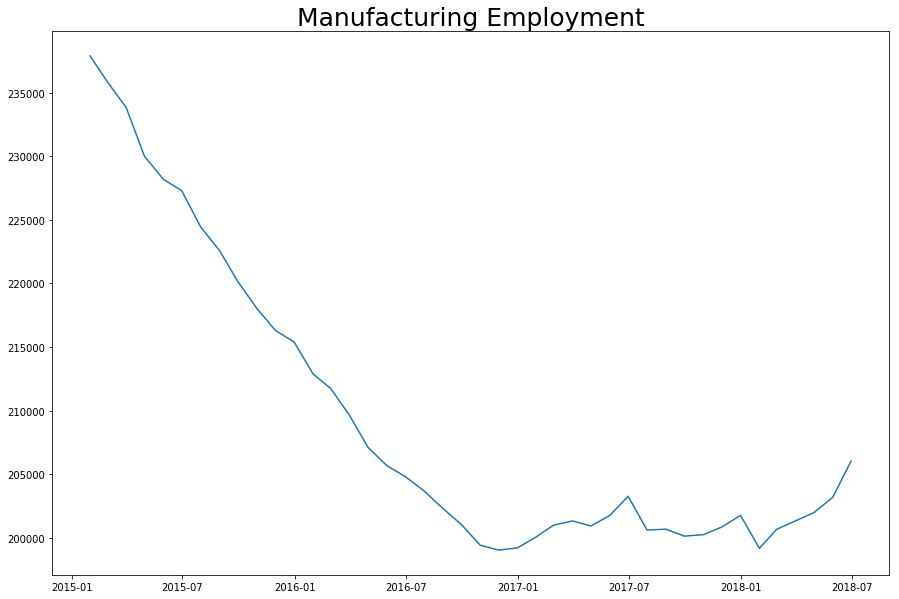

In [257]:
plt.figure(figsize=(15,10))
plt.plot(hv_manufacturing['employment'])
plt.title(label = 'Manufacturing Employment', fontsize=25)
plt.show();

In [304]:
ma_manufacturing = ARIMA(endog = train_manufacturing['employment'], 
            order = (1, 0, 1)) 

model = ma_manufacturing.fit()
preds_manufacturing = model.predict()
r2_score(preds_manufacturing, hv_manufacturing['employment'])

ValueError: Found input variables with inconsistent numbers of samples: [31, 42]

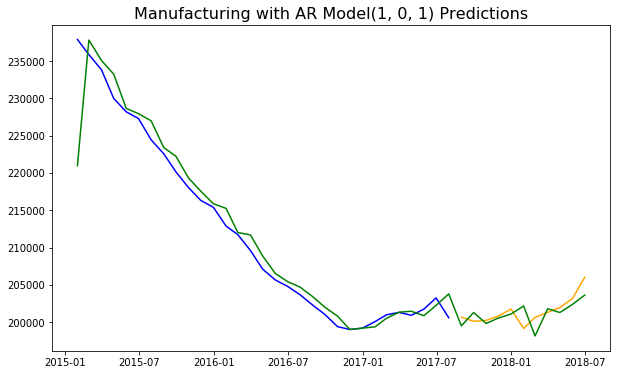

In [303]:
plt.figure(figsize=(10,6))
plt.plot(train_manufacturing['employment'], color = 'blue')
plt.plot(test_manufacturing['employment'], color = 'orange')
plt.plot(preds_manufacturing, color = 'green')
plt.title(label = 'Manufacturing with AR Model(1, 0, 1) Predictions', fontsize=16)
plt.show();

In [271]:
preds_manufacturing = preds_manufacturing.to_frame(name= 'employment')
preds_manufacturing.head()

,employment
2015-01-31,220967.910177
2015-02-28,237796.621169
2015-03-31,235069.788238
2015-04-30,233240.516853
2015-05-31,228635.299607


In [ ]:
# Hurricane Irma hit Florida as a Category 4 storm the morning of Sept. 10, 2017. 
# We will be looking into the leisure/hospitality sector of jobs.




In [349]:
hi_leisure = pd.read_csv('./Irma-Industry/leisure_hospitality_all_employees.csv', header=None, names=['date', 'employment'])


#read in data

In [350]:
hi_leisure.index = pd.DatetimeIndex(start = '2015-01',
                                periods = len(hi_leisure['date']),
                                freq = 'M')

#convert dates into the index

In [351]:
hi_leisure.drop(columns = 'date', inplace = True)

#drop date column

In [362]:
hi_leisure.shape

(42, 1)

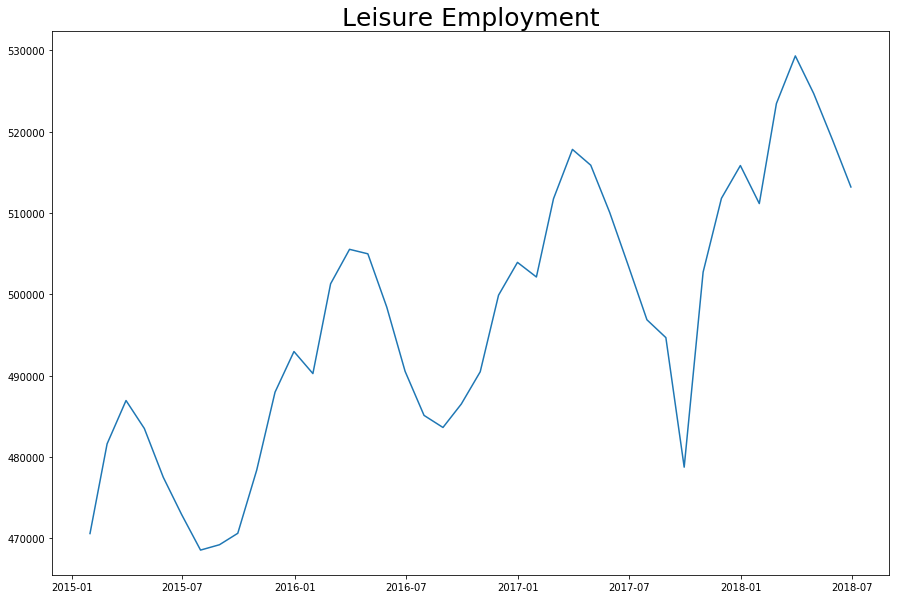

In [363]:
plt.figure(figsize=(15,10))
plt.plot(hi_leisure['employment'])
plt.title(label = 'Leisure Employment', fontsize=25)
plt.show();

# checking out the raw graph. 
# clear evidence of seasonality - Seasonal ARIMA model is ideal here. we can set 
# the seasonal order manually through graph observation. 2 periods indicated 
# on the graph.

In [354]:
interpret_dftest(adfuller(hi_leisure['employment'])) 

#our guess of non stationarity is verified with the Doohicky fuller test. 
#Dicky fuller test. p-value > alpha(.1) so cannot assume stationarity

Test Statistic   -2.500704
p-value           0.115303
dtype: float64

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


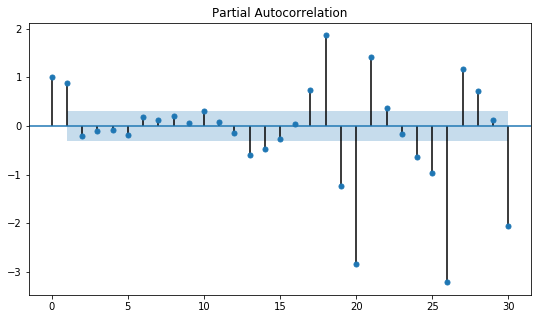

In [355]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(hi_leisure['employment'], lags=30, ax=ax)
plt.show();

# Partial Auto Correlaton plot shows observations are highly correlated. the observations 
# in the blue shade are not highly correlated. we will use p = 1 or 2. 

In [365]:
train_hileisure = hi_leisure.iloc[:29]

test_hileisure = hi_leisure.iloc[30:]

#set up a training and testing set to predict what would normally happen to the 
#number of jobs if no disaster was involved
# compare predicted amount of jobs(without hurricane)vs actual number of jobs(with the hurricane)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


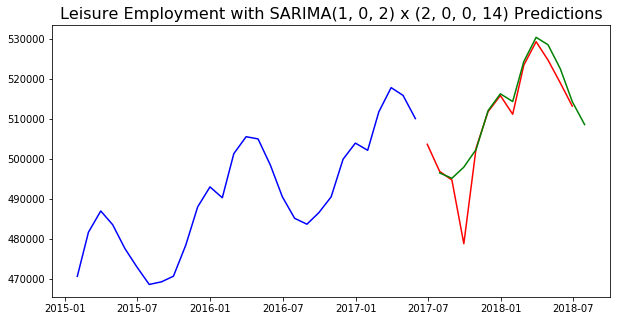

77086582.96439324


In [393]:
sarima_hileisure = SARIMAX(enforce_stationarity=False, endog = train_hileisure['employment'],
                 order = (1, 0, 2),              
                 seasonal_order = (2, 0, 0, 12)) 
# Fit SARIMA model.
model_hileisure = sarima_hileisure.fit()

# Generate predictions based on test set.
# Start at time period 31 and end at 41.
preds_hileisure = model_hileisure.predict(start=30, end=42)


# Plotting data.
plt.figure(figsize=(10,5))
plt.plot(train_hileisure['employment'], color = 'blue')
plt.plot(test_hileisure['employment'], color = 'red')
plt.plot(preds_hileisure, color = 'green')
plt.title(label = 'Leisure Employment with SARIMA(1, 0, 2) x (2, 0, 0, 14) Predictions', fontsize=16)
plt.show();


print(mean_squared_error(test_hileisure['employment'], preds_hileisure))



In [ ]:
 # MSE looks good. our predictions in green show what we expected to happen
 # to the number of jobs. the red line indicated what actually happened a month 
 # following the hurricane. as you can see the number of jobs dropped considerably 
 # then within a couple of months the industry recovered. 

In [385]:
preds_hileisure = preds_hileisure.to_frame(name='employment')

In [391]:
df_merged_hileisure = hi_leisure.merge(preds_hileisure, how='outer', left_index=True, right_index=True)

df_merged_hileisure.head()

,employment_x,employment_y
2015-01-31,470577.0,NaN
2015-02-28,481606.0,NaN
2015-03-31,486937.0,NaN
2015-04-30,483497.0,NaN
2015-05-31,477498.0,NaN


In [388]:
df_merged_hileisure['difference'] = df_merged_hileisure.employment_x - df_merged_hileisure.employment_y

In [392]:
df_merged_hileisure.head()

,employment_x,employment_y
2015-01-31,470577.0,NaN
2015-02-28,481606.0,NaN
2015-03-31,486937.0,NaN
2015-04-30,483497.0,NaN
2015-05-31,477498.0,NaN


In [ ]:
# here we merged the predictions with the actuals post hurricane to give us a 
# numerical representation of the data. from 8-2017 to 9-2017 the number of jobs 
# dropped by about 16,000 then recovered in the following months. 